In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual style settings
sns.set(style='whitegrid')

In [3]:
# Load dataset
df = pd.read_csv(r"D:\Ai Adventures\Analyst Projects\Zomato\zomato.csv", encoding='latin-1')

# Display first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# See the number of rows and columns
print(f"Shape: {df.shape}")

# Column names
print("Columns:", df.columns.tolist())

# Info about data types and nulls
df.info()

Shape: (9551, 21)
Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude  

In [5]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.head())

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude    

In [6]:
df.drop(['Restaurant ID', 'Address', 'Locality Verbose', 'Switch to order menu'], axis=1, inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Cuisines'] = df['Cuisines'].fillna('Not Available')

In [9]:
df.rename(columns={
    'Restaurant Name': 'Restaurant',
    'Average Cost for two': 'Cost_for_two',
    'Has Table booking': 'Table_booking',
    'Has Online delivery': 'Online_delivery',
    'Is delivering now': 'Delivering_now',
    'Price range': 'Price_range',
    'Aggregate rating': 'Rating',
    'Rating color': 'Rating_color',
    'Rating text': 'Rating_text'
}, inplace=True)

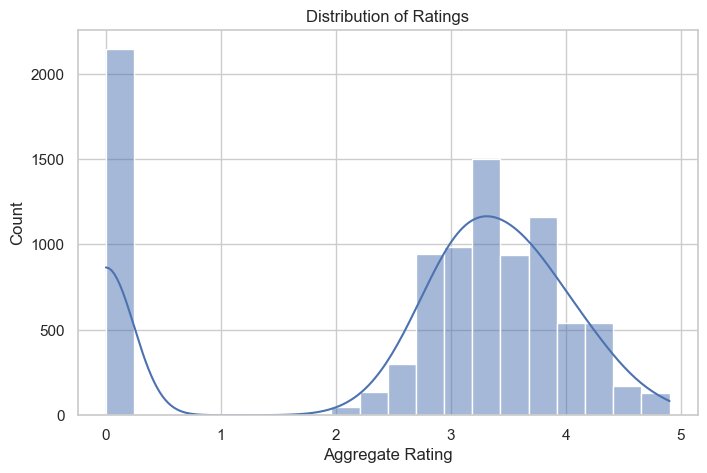

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

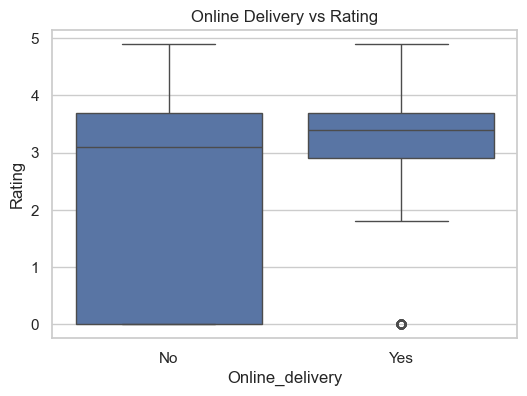

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Online_delivery', y='Rating')
plt.title('Online Delivery vs Rating')
plt.show()

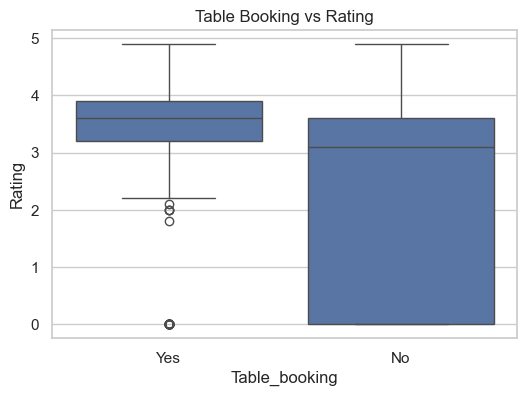

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Table_booking', y='Rating')
plt.title('Table Booking vs Rating')
plt.show()

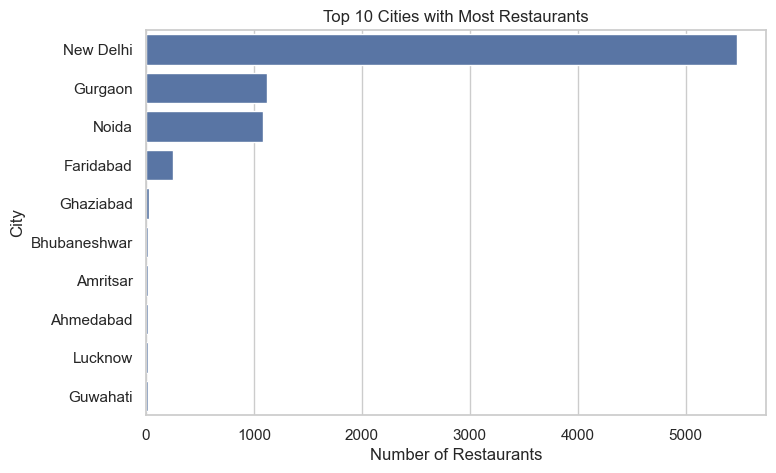

In [13]:
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

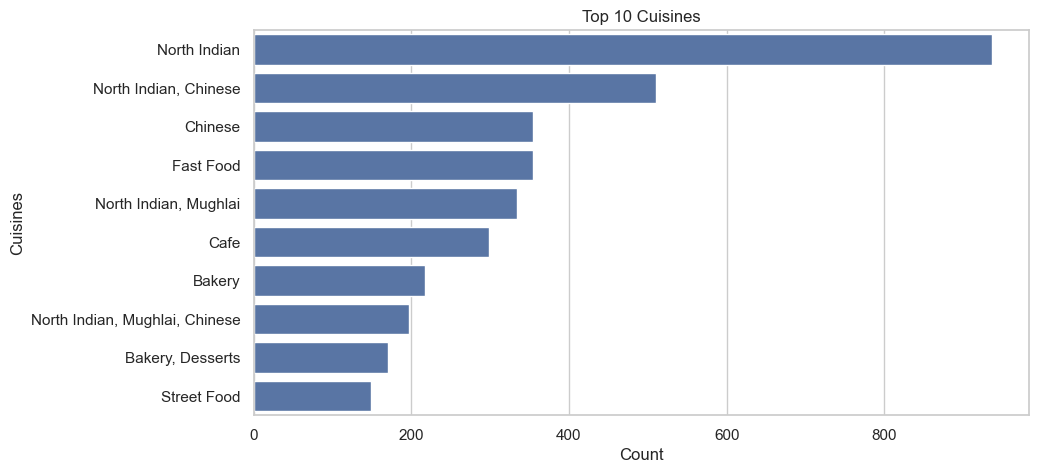

In [14]:
top_cuisines = df['Cuisines'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

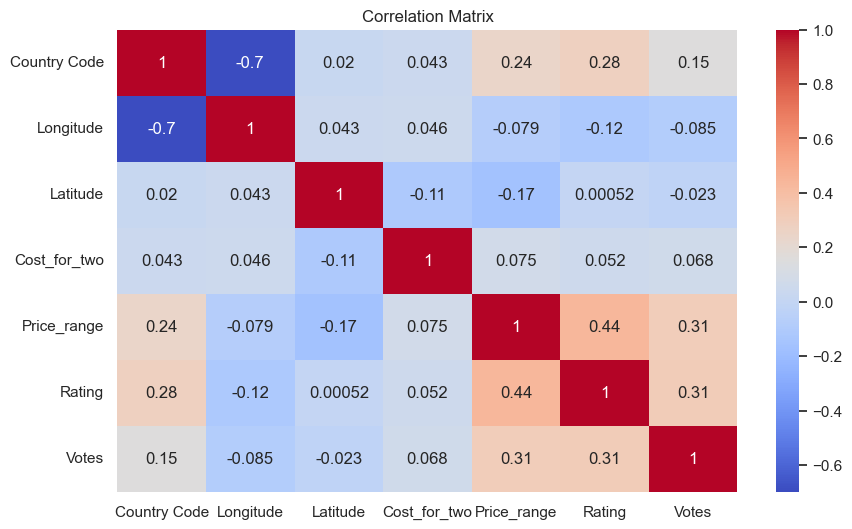

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.to_csv('zomato_cleaned.csv', index=False)